# Проект: Исследование стартапов.

- Автор: Петухова О.А.
- Дата: 28.04.2025

## Введение

### Цели и задачи проекта

**Цель** - подготовить датасет и проверить в нём данные, а также ответить на вопросы заказчика.


**Задачи:**
1. по каким столбцам можно объединять данные из разных таблиц;
2. можно ли доверять данным о сотрудниках стартапов и их образовании;
3. что значат покупки за 0 или за 1 доллар;
4. какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
5. как рассчитать и отобразить численные показатели и динамику.


### Содержимое проекта
1. Загрузка данных и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединенных таблиц.
4. Итоговый вывод и рекомендации.

## 1.1 Загрузка данных и первичная предобработка.

### 1.1.1 Загрузим все данные по проекту.
Начнём с загрузки библиотек и датасетов `company_and_rounds.csv`, `acquisition.csv`, `people.csv`, `education.csv`, `degrees.csv`, `fund.csv`, `investment.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в переменных: `acquisition_df`, `company_and_rounds_df`, `education_df`, `people_df`, `degrees_df`, `fund_df`, `investment_df`.

In [8]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Выгружаем данные в переменные acquisition_df, company_and_rounds_df, education_df, people_df и degrees_df, fund_df, investment_df.
PATH = "https://code.s3.yandex.net/datasets/"
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
education_df = pd.read_csv(PATH + 'education.csv')
people_df = pd.read_csv(PATH + 'people.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')

fund_df = pd.read_csv(PATH + 'fund.csv')
investment_df = pd.read_csv(PATH + 'investment.csv')

Познакомимся с данными датасета `acquisition.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [16]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [17]:
acquisition_df.shape

(9407, 6)

In [18]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [19]:
#проверка дубликатов
acquisition_df.duplicated().sum()

0

Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк.

После первичного анализа данных можно сделать следующие выводы:
- Значения в столбцах `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` представлены типом данных int.
- Столбец `term_code` представлен уникальным типом данных object, но его лучше отнести к типу category.
- столбец `acquired_at` - дата сделки, его необходимо привести к типу данных date.
- Пропуски содержатся в столбцах `term_code`, `acquired_at`.
- Названия столбцов приведены к единому виду snake case.
- Дубликатов не обнаружено.


In [21]:
#Переименуем столбцы в acquisition
acquisition_df = acquisition_df.rename(columns={
    'id': 'id_acq'})
acquisition_df.columns

Index(['id_acq', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

Теперь познакомимся с данными датасета `company_and_rounds.csv`.

In [23]:
# Выведем 7 случайных строк
company_and_rounds_df.sample(n=7)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
34791,171090.0,Browsergamez.com,advertising,operating,2009-01-01,NaN,browsergamez.com,browsergamezcom,DEU,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176143,4883.0,kajeet,mobile,operating,2003-01-01,NaN,kajeet.com,kajeet,USA,0.0,...,1.0,3946.0,4883.0,2008-11-24,series-b,1050000.0,0.0,0.0,0.0,0.0
213527,84532.0,Mammoth Marathons,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44045,180137.0,Ford Mondeo Sydney,local,operating,NaN,NaN,fordmondeosydney.com.au,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34875,171182.0,PRX Control Solutions,software,operating,2012-02-15,NaN,prxcontrolsolutions.com,prxsolutions,VEN,0.0,...,2.0,51505.0,171182.0,2013-03-15,angel,70000.0,0.0,0.0,1.0,1.0
191502,6232.0,ANT,software,operating,NaN,NaN,antlimited.com,NaN,GBR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157054,32755.0,Spartan Mobile,NaN,operating,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
company_and_rounds_df.shape

(217774, 22)

In [25]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.  Можно отметить, что:

- Названия столбцов не приведены к единому виду snake case.
- Типы данных в столбцах `name`, `domain`, `network username`, `funding total`, `funding round id`, `raised amount`, `pre money valuation`, `is first round`, `is last round` соответствуют содержимому. 
- Пропуски встречаются во всех столбцах, кроме `company ID`, `name`, `status`, `investment rounds`, `funding rounds`, `milestones`.
- Значения в столбцах соответствуют описанию.
- Следующие столбцы нужно привести к правильному типу данных: `company ID` - int, `category code` - category, `status` - category, `founded at` - date, `closet at` - date, `country code` - category, `milestones` - int, `company id` - int, `funded at` - date, `funding round type` - category, `participants` - int.

In [29]:
company_and_rounds_df.duplicated().sum()

0

Дубликатов не обнаружено.

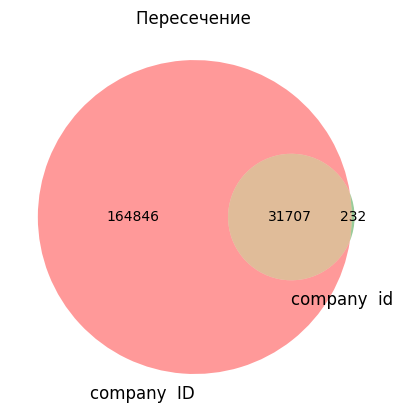

In [31]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
#Сравним содержание двух столбцов company ID и company id
first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
second_id = set(company_and_rounds_df['company  id'].dropna().unique())
#Построим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))
plt.title("Пересечение ") 
plt.show()

Столбцы не совпадают, также есть 232 компании, которые не входят в company_ID, переименуем столбцы.

In [33]:
#Переименуем первый столбец, чтобы названия были уникальными
company_and_rounds_df.columns.values[0] = 'first_company_id'

In [34]:
# Приводим все столбцы к стилю snake case.
company_and_rounds_df.columns = company_and_rounds_df.columns.str.lower().str.replace(' ', '_').str.strip('_').str.replace(r'_{2,}', '_', regex=True)
company_and_rounds_df.columns

Index(['first_company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Рассмотрим данные датасета `education.csv`

In [39]:
education_df.sample(n=5)

,id,person_id,instituition,graduated_at
50153,50150,206466,Washington University in St. Louis,2002-01-01
70929,70925,226591,Bentley College - Elkin B. McCallum Graduate S...,1993-01-01
48759,48757,6974,University of Utah,NaN
31488,31486,185803,Parsons School of Design,NaN
26231,26227,175152,HEC Montreal,2008-01-01


In [40]:
education_df.shape

(109610, 4)

In [41]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [42]:
education_df.duplicated().sum()

0

Датасет `education.csv` содержит 4 столбца и 109610 строк.

О данных можно сделать следующие выводы:
- Значения в столбцах `id`, `person_id` представлены типом данных int.
- Столбец `instituition` представле типом данных object.
- Cтолбец `graduated_at` - дата получения оброазования, его необходимо привести к типу данных date.
- Пропуски содержатся в столбце `graduated_at`, `instituition`.
- Названия столбцов приведены к единому виду snake case.
- Дубликатов не обнаружено.

Теперь рассмотрим датасет `people.csv`.

In [44]:
people_df.sample(n=5)

,id,first_name,last_name,company_id,network_username
76776,189541,Benedetta,Borri,NaN,NaN
25328,13236,Dafne,Gobbi,NaN,NaN
164000,34653,Dean,Scheu,NaN,NaN
136498,248628,Daniel,Rizer,NaN,NaN
188015,58348,Troy,Rumfelt,NaN,NaN


In [45]:
people_df.shape

(226709, 5)

In [46]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [47]:
people_df.duplicated().sum()

0

Датасет `people.csv` содержит 5 столбцов и 226709 строк.

В данных:
- Значения в столбцах `id` представлены типом данных int.
- Столбцы `first_name`, `last_name`, `network_username` соответсвуют типу данных object.
- Cтолбец `company_id` - необходимо привести к типу данных int.
- Пропуски содержатся во всех столбцах, кроме `id`.
- Названия столбцов приведены к единому виду snake case.
- Дубликатов не обнаружено.

Рассмотрим датасет `degrees.csv`.

In [49]:
degrees_df.sample(n=5)


,id,object_id,degree_type,subject
24473,24474,p:166807,BS,Electrical Engineering and Information Technology
85097,85098,p:239076,MS,Chemical Engineering
48202,48203,p:175125,BA,Government
77257,77258,p:231645,BA,NaN
38106,38107,p:78921,NaN,Computer Engineering


In [50]:
degrees_df.shape

(109610, 4)

In [51]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [52]:
degrees_df.duplicated().sum()

0

Датасет `degrees.csv` содержит 4 столбца и 109610 строк.

О данных можно сделать следующие выводы:
- Значения в столбцах `id` представлены типом данных int.
- Столбец `object_id` представле типом данных object, так как он содержит буквы и числа.
- Cтолбцы `degree_type`, `subject` - необходимо привести к категориальному типу данных.
- Пропуски содержатся в столбцах `degree_type`, `subject`, `object_id`.
- Названия столбцов приведены к единому виду snake case.
- Дубликатов не обнаружено.



In [54]:
#Переименуем столбец в degrees
degrees_df = degrees_df.rename(columns={
    'id': 'id_degrees'})
degrees_df.columns

Index(['id_degrees', 'object_id', 'degree_type', 'subject'], dtype='object')

### Промежуточный вывод
​
Данные предоставили хорошего качества, в удовлетворительном количестве, которые соответствуют описанию. Встречается много пропусков, которые стоит изучить подробнее. Мы уже видим, что во всех датасетах не во всех столбцах правильно выбраны типы данных. У датафреймов разное количество строк. Также в датасете `company_and_rounds.csv` названия столбцов не приведены к единому виду, было 2 столбца company_id. В датафреймах есть столбцы с одинаковыми названиями,они были переименованы.

### 1.1.2 Смена типов и анализ пропусков.

Обработаем типы данных в столбцах, которые хранят значения даты и времени.

In [59]:
# Меняем тип данных на значения даты и времени в датафрейме acquisition_df
acquisition_df['acquired_at']=pd.to_datetime(acquisition_df['acquired_at'], errors = 'coerce')
# Меняем тип данных на значения даты и времени в датафрейме company_and_rounds_df, здесь три столбца не соответсвуют значениям.
company_and_rounds_df['founded_at']=pd.to_datetime(company_and_rounds_df['founded_at'], errors = 'coerce')
company_and_rounds_df['closed_at']=pd.to_datetime(company_and_rounds_df['closed_at'], errors = 'coerce')
company_and_rounds_df['funded_at']=pd.to_datetime(company_and_rounds_df['funded_at'], errors = 'coerce')
# В последнем датафрейме education_df сменим тип данных у столбца graduated_at
education_df['graduated_at']=pd.to_datetime(education_df['graduated_at'], errors = 'coerce')

In [61]:
acquisition_df.dtypes

id_acq                           int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [62]:
company_and_rounds_df.dtypes

first_company_id              float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id                    float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [63]:
education_df.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [64]:
!pip install missingno
import missingno as msno


Анализ пропущенных значений в acquisition_df:


,Количество пропусков,Процент пропусков (%)
id_acq,0,0.00
acquiring_company_id,0,0.00
acquired_company_id,0,0.00
term_code,7576,80.54
price_amount,0,0.00
acquired_at,29,0.31


<AxesSubplot:>

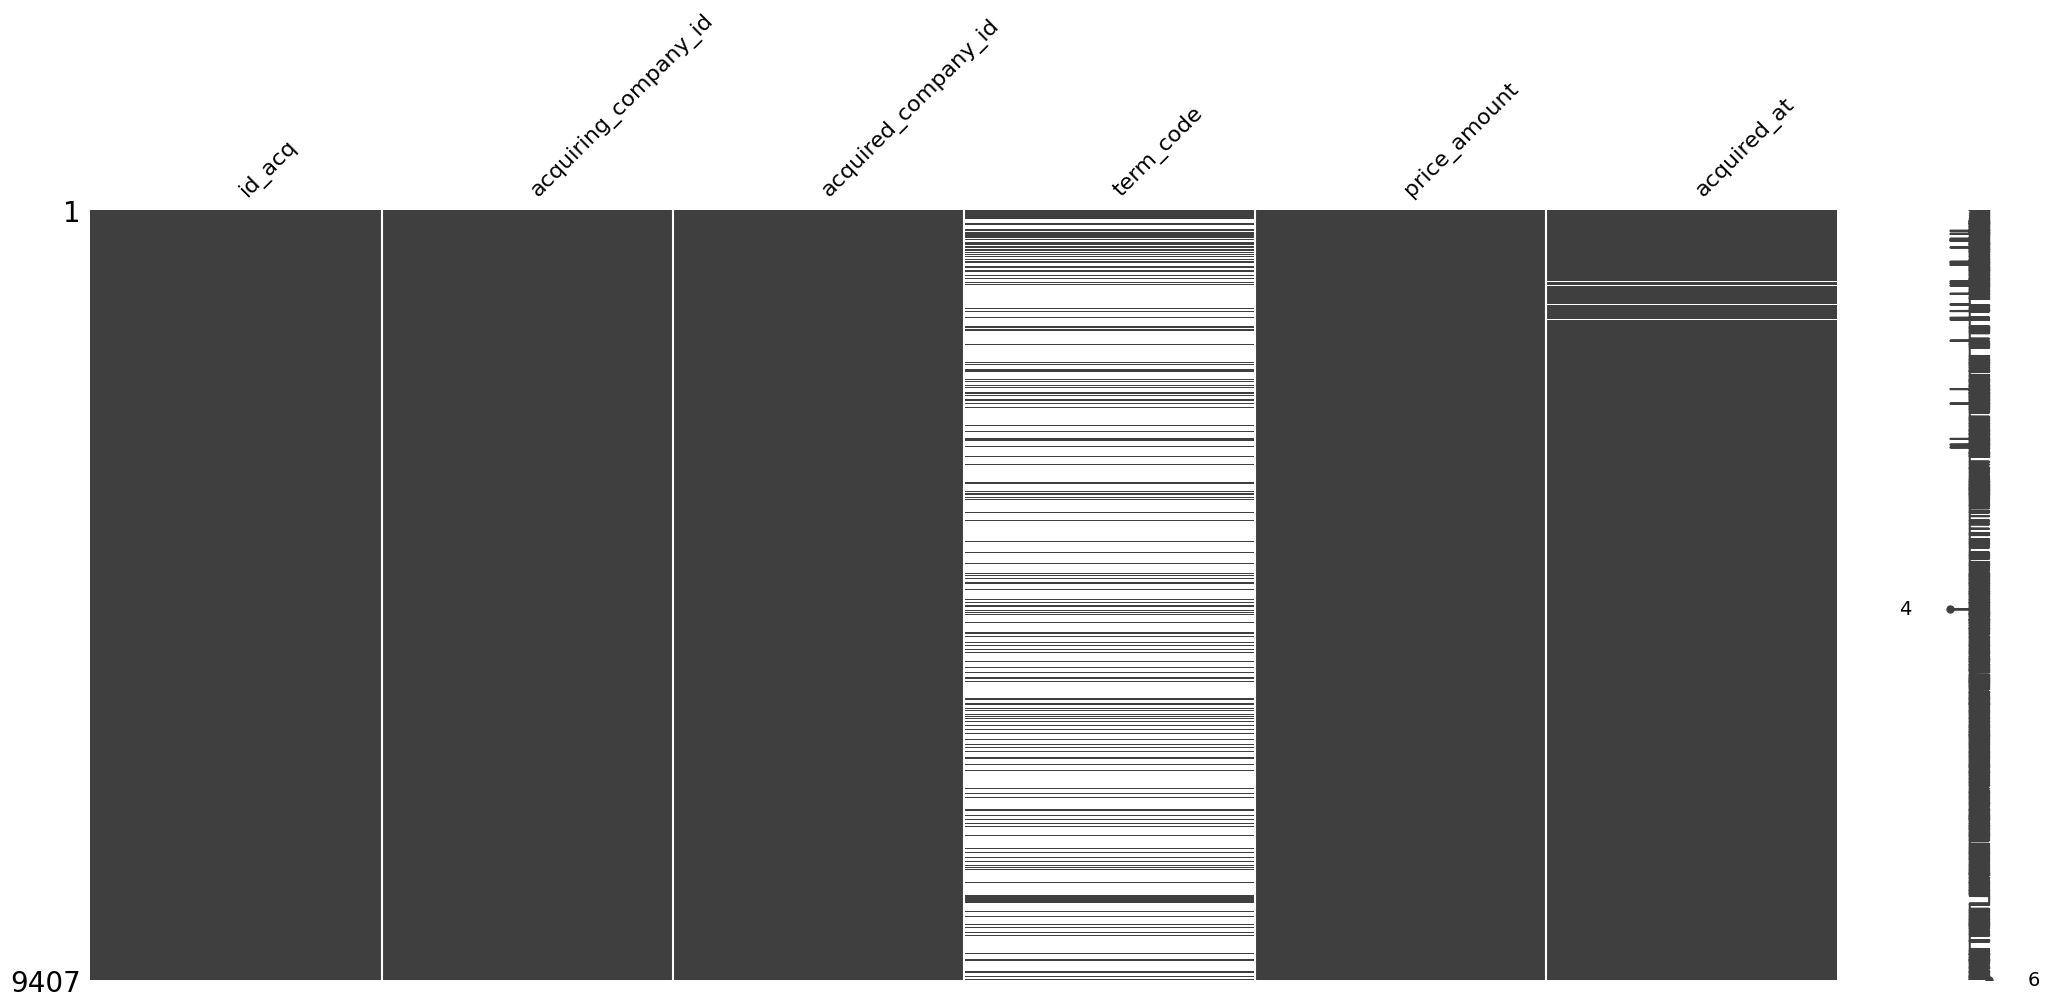

In [65]:
# Подсчитываем процент строк с пропусками в acquisition_df
missing_percentage1 = round(acquisition_df.isna().sum() / len(acquisition_df) * 100,2) 
missing_df1 = pd.DataFrame({
    'Количество пропусков': acquisition_df.isna().sum(),
    'Процент пропусков (%)': missing_percentage1
})
print("\nАнализ пропущенных значений в acquisition_df:")
display(missing_df1)
msno.matrix(acquisition_df)

Большое количество пропущенных значений (80.5%) в столбце term_code (варианты расчета), этот столбец может быть пустой, так как не во все стартапы готовы инвестировать. Также в пропущенных значениях столбец acquired_at (дата сделки) - всего 0.31%, что ничтожно мало, поэтому его можно оставить без изменений. 


Анализ пропущенных значений в company_and_rounds_df:


,Количество пропусков,Процент пропусков (%)
first_company_id,302,0.14
name,302,0.14
category_code,73888,33.93
status,302,0.14
founded_at,107818,49.51
closed_at,214325,98.42
domain,70615,32.43
network_username,122240,56.13
country_code,109167,50.13
investment_rounds,302,0.14


<AxesSubplot:>

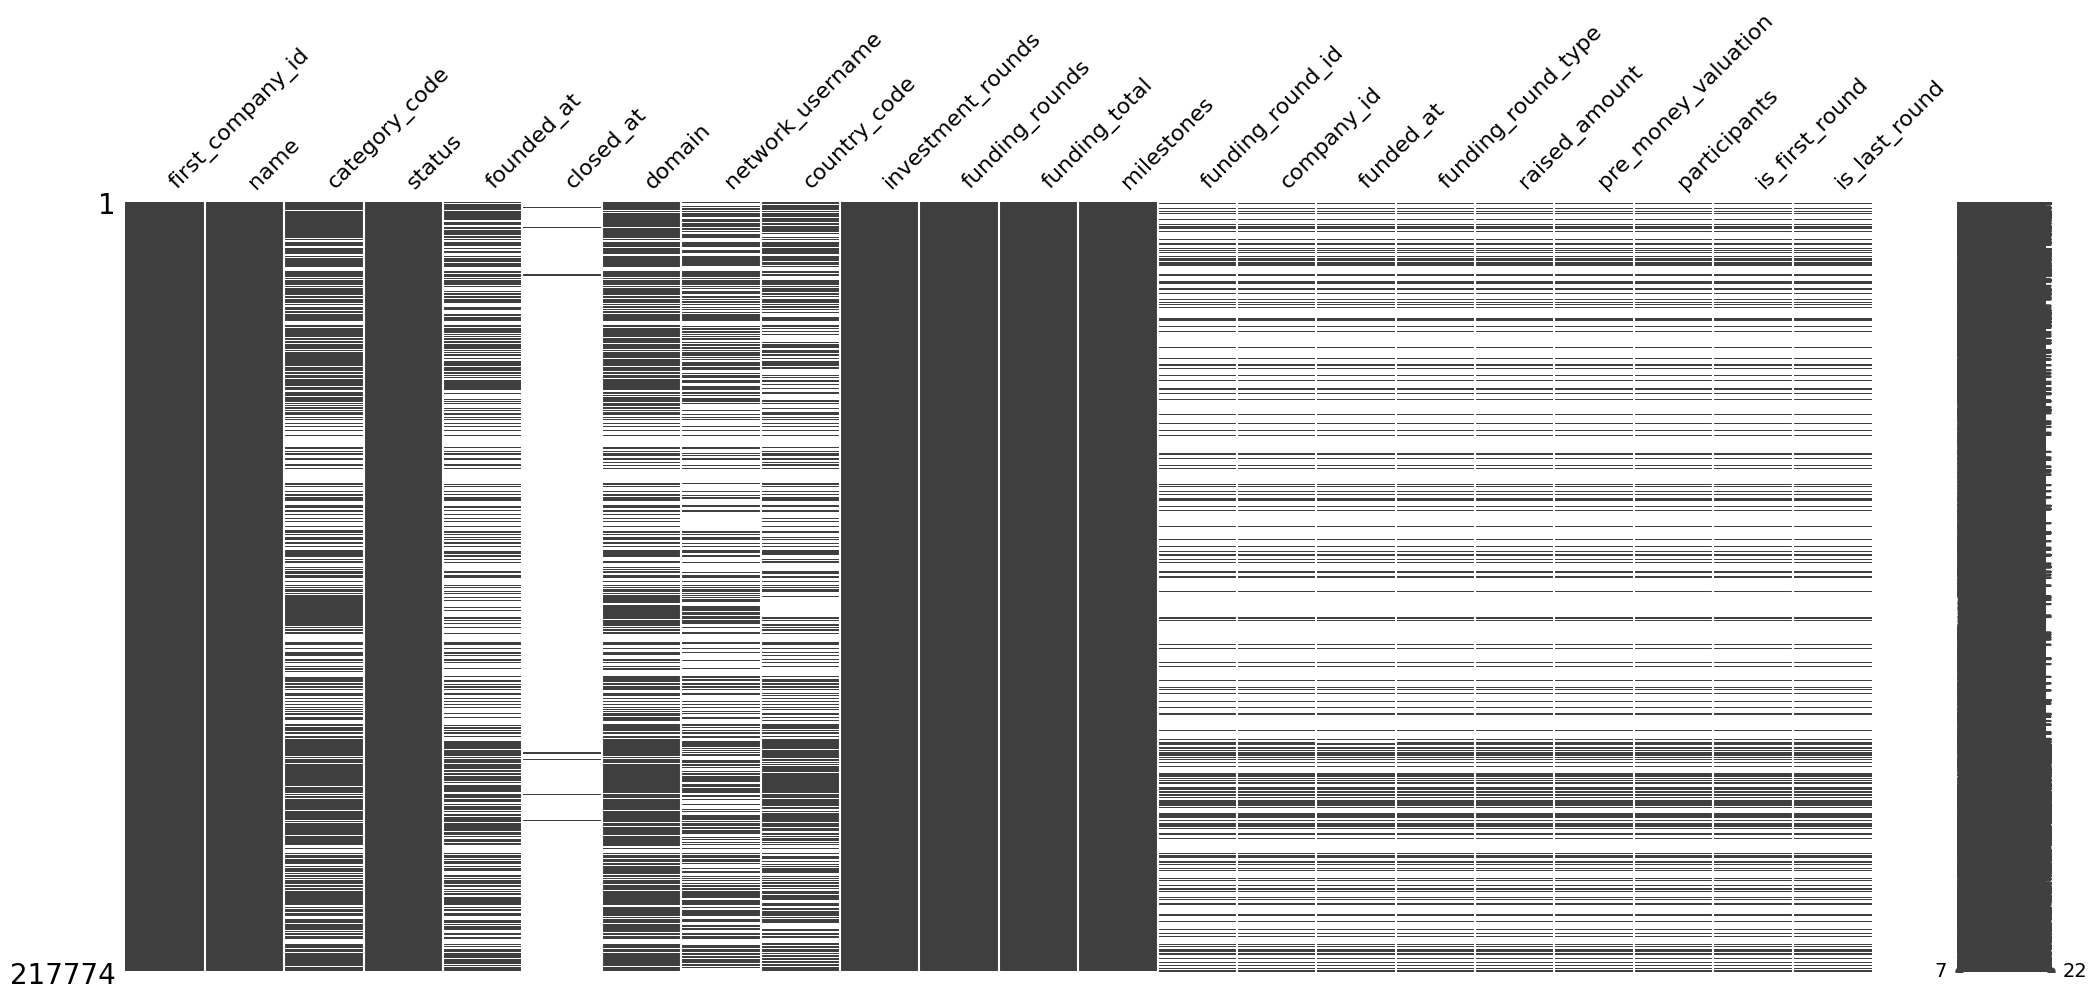

In [67]:
missing_percentage2 = round(company_and_rounds_df.isna().sum() / len(company_and_rounds_df) * 100,2) 
missing_df2= pd.DataFrame({
    'Количество пропусков': company_and_rounds_df.isna().sum(),
    'Процент пропусков (%)': missing_percentage2
})
print("\nАнализ пропущенных значений в company_and_rounds_df:")
display(missing_df2)
msno.matrix(company_and_rounds_df)


Датасет company_and_rounds_df как раз содержит информацию о компаниях и раундах финансирования. Здесь встречается много пропуском более 75% в таких столбцах как closet_at (дата закрытия компании), funding_round_id (число раундов финансирования), company_id, funded_at (дата финансирования), funding_round_type (тип финансирования), raised_amount (сумма финансирования) и тд. Это гооврит о том, что лишь 1/4 часть компаний интересны для инвестирования, остальные закрываются.


Анализ пропущенных значений в education_df:


,Количество пропусков,Процент пропусков (%)
id,0,0.00
person_id,0,0.00
instituition,55,0.05
graduated_at,51556,47.04


<AxesSubplot:>

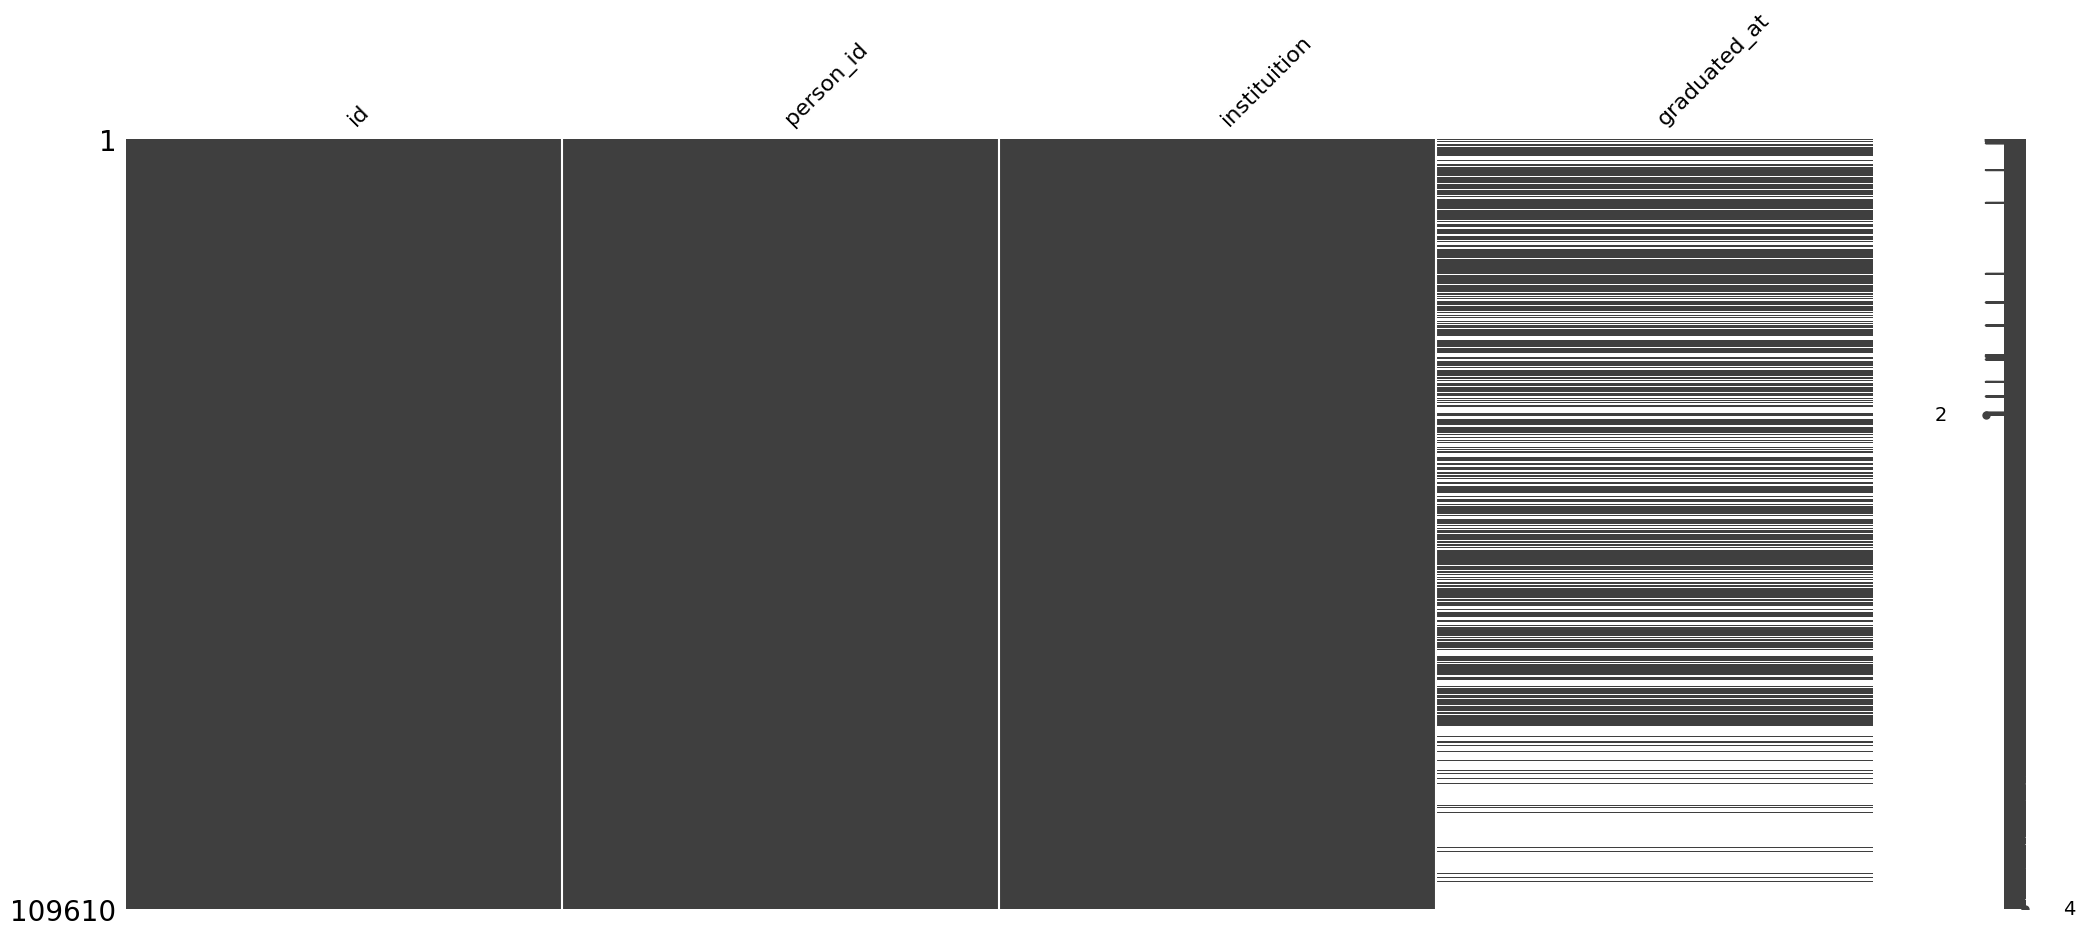

In [72]:
missing_percentage3 = round(education_df.isna().sum() / len(education_df) * 100,2) 
missing_df3= pd.DataFrame({
    'Количество пропусков': education_df.isna().sum(),
    'Процент пропусков (%)': missing_percentage3
})
print("\nАнализ пропущенных значений в education_df:")
display(missing_df3)
msno.matrix(education_df)

Почти половина сотрудников не получила образование до конца, хотя почти все, за исключением (0.05%) поступали в учебное заведение.


Анализ пропущенных значений в people_df:


,Количество пропусков,Процент пропусков (%)
id,0,0.00
first_name,5,0.00
last_name,1,0.00
company_id,192094,84.73
network_username,187842,82.86


<AxesSubplot:>

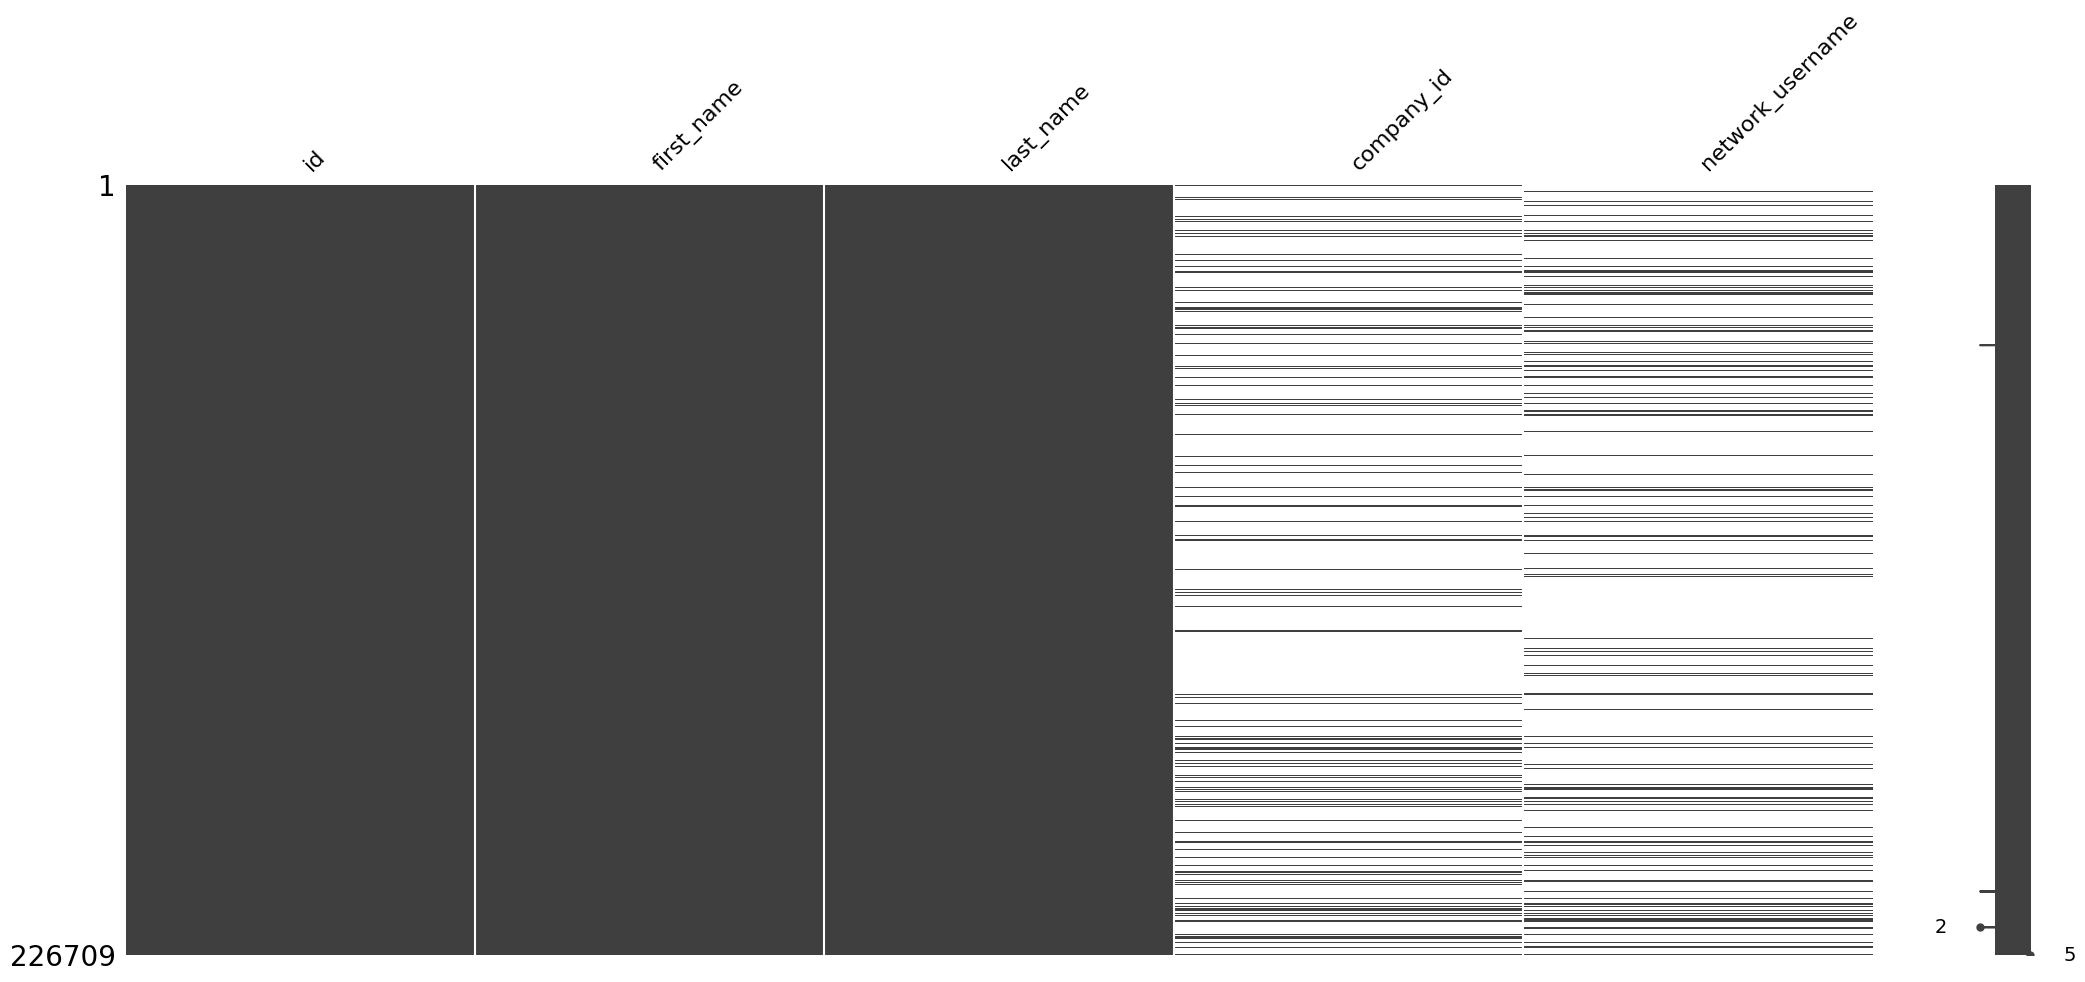

In [74]:
missing_percentage4 = round(people_df.isna().sum() / len(people_df) * 100,2) 
missing_df4= pd.DataFrame({
    'Количество пропусков': people_df.isna().sum(),
    'Процент пропусков (%)': missing_percentage4
})
print("\nАнализ пропущенных значений в people_df:")
display(missing_df4)
msno.matrix(people_df)

Пропуски более 80% в столбцах company_id и network_username.


Анализ пропущенных значений в degrees_df:


,Количество пропусков,Процент пропусков (%)
id_degrees,0,0.00
object_id,0,0.00
degree_type,11218,10.23
subject,28312,25.83


<AxesSubplot:>

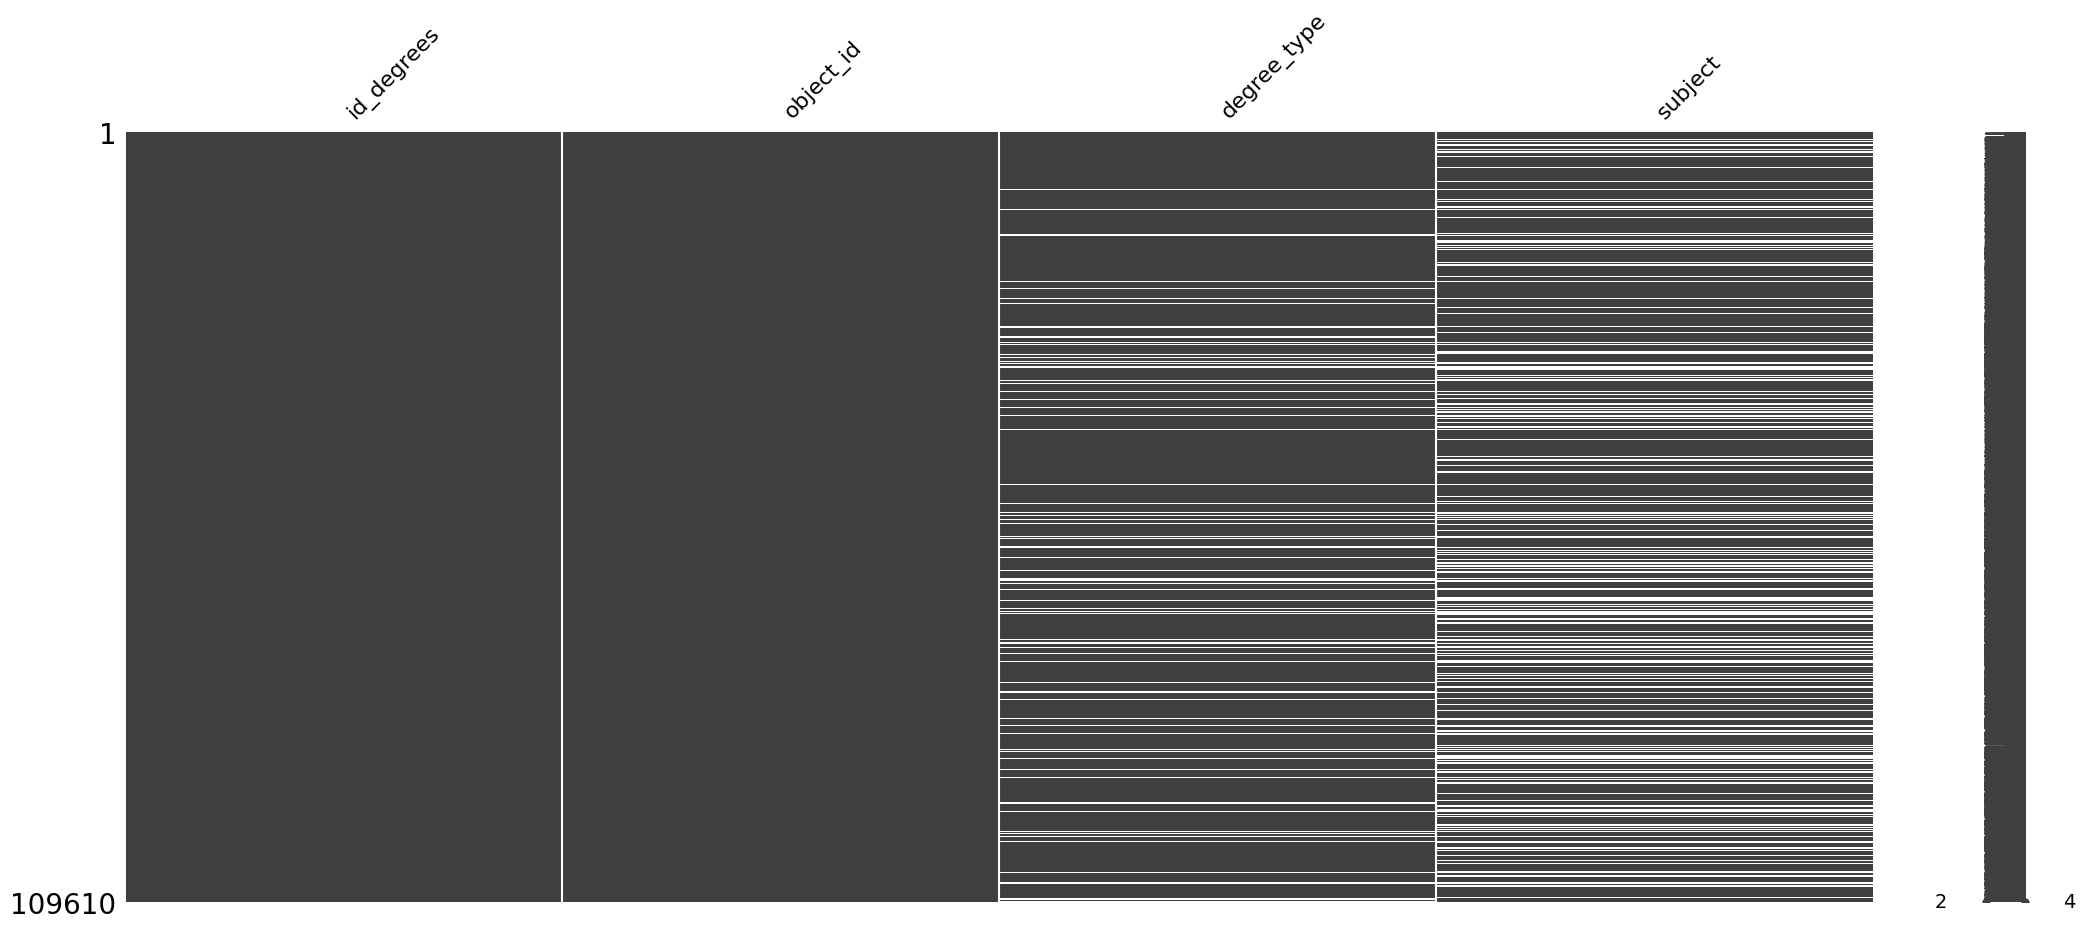

In [76]:
missing_percentage5 = round(degrees_df.isna().sum() / len(degrees_df) * 100,2) 
missing_df5= pd.DataFrame({
    'Количество пропусков': degrees_df.isna().sum(),
    'Процент пропусков (%)': missing_percentage5
})
print("\nАнализ пропущенных значений в degrees_df:")
display(missing_df5)
msno.matrix(degrees_df)

Не указаны тип образования (degree_type) - 10% и специальность (subject) - 25.8%.

### Промежуточный вывод. 

Столбцы, которые хранят значения даты и времени приведены к типу данных datetime, данных вполне достаточно для анализа. Пропусков много, но они допустимы.

## 2.1 Предобработка данных, предварительное исследование

### 2.1.1 Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?


Составим сводную таблицу по годам, в которой для каждого года будет указан: типичный размер средств в рамках однго раунда и общее количество раундов финансирования за этот год.

In [82]:
# Создаем новый столбец year с годом совершения действия, преобразуя каждую дату в год
company_and_rounds_df['year']=company_and_rounds_df['funded_at'].dt.year
# создадим сводную таблицу
table = company_and_rounds_df.groupby('year')['raised_amount'].agg([('median_amount', 'median'), ('round_count', 'count')]).reset_index()
# отфильтруем, оставим только те года, где есть информация более чем о 50 раундах финансирования.   
filtered_table = table[table['round_count']>50]
# отсортируем
result_table = filtered_table.sort_index()
result_table

,year,median_amount,round_count
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


Построим линейный график, на основании полученной таблицы

Text(0, 0.5, 'сумма млн')

<Figure size 1200x1000 with 0 Axes>

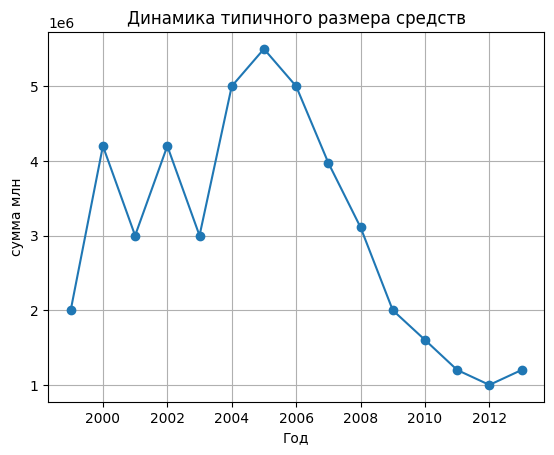

In [84]:
plt.figure(figsize=(12, 10))
lin = result_table.plot(kind = 'line', x = 'year', y = 'median_amount', title = 'Динамика типичного размера средств', legend = False, grid = True,  marker='o')
plt.xlabel('Год')
plt.ylabel ('сумма млн')

Год с максимальным типичным размером средств - 2005.
В 2013 году по сравнению с предыдущими годами (с 2006 по 2012) количество раундов стало увеличиваться, как и выделяемые средства. с 2006 - 2012 был спад.

In [87]:
year_2013=company_and_rounds_df[company_and_rounds_df['year']==2013].copy()
# С помощью акцессора создаем новый столбец вида YYYY-MM
year_2013['month']=year_2013['funded_at'].dt.to_period('M')

# создадим сводную таблицу
table_2013 = year_2013.groupby('month')['raised_amount'].agg([('median_amount', 'median'), ('round_count', 'count')]).reset_index()
# отсортируем
table_2013 = table_2013.sort_index()
table_2013

,month,median_amount,round_count
0,2013-01,700000.0,1024
1,2013-02,1000000.0,740
2,2013-03,750000.0,865
3,2013-04,1100000.0,927
4,2013-05,1037500.0,951
5,2013-06,1200000.0,1039
6,2013-07,1500000.0,1017
7,2013-08,1000000.0,977
8,2013-09,1400000.0,1064
9,2013-10,1500000.0,1100


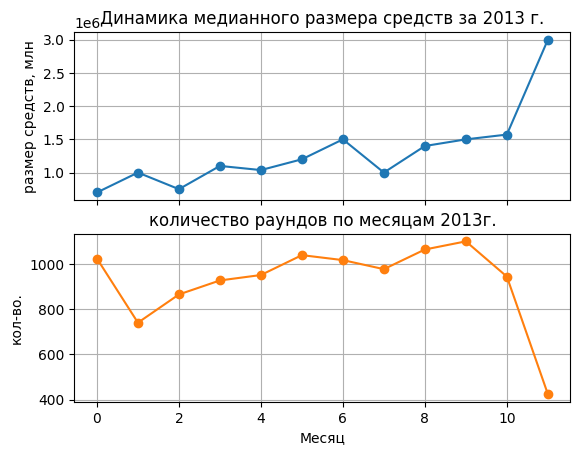

In [88]:
axes = table_2013.plot(kind='line',
                   subplots=True,
                   sharex=True,
                   sharey=False,
                   legend=False,
                   marker='o', # Установка маркера для точек
                   title=['Динамика медианного размера средств за 2013 г.', 'количество раундов по месяцам 2013г.'])

# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('размер средств, млн')
axes[1].set_ylabel('кол-во.')

# Включаем сетку для каждого из подграфиков
axes[0].grid(which='both')
axes[1].grid(which='both')

# Подписываем ось X
plt.xlabel('Месяц')
plt.show()

В 2013 году в первые 10 месяцев количество раундов было максимально, а вот размер средств минимальным. Начиная с октября, ситуация изменилась в противоположную сторону: количество раундов уменьштлось, а вот медианная сумма пошла вверх.

### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [92]:
#Переименуем столбцы в education
education_df = education_df.rename(columns={
    'id': 'id_edu',
    'person_id': 'id'})
education_df.columns

Index(['id_edu', 'id', 'instituition', 'graduated_at'], dtype='object')

In [93]:
# Объеденим данные о сотрудниках и их образовании.
people_edu_df = people_df.merge(education_df, on = 'id', how = 'left')
people_edu_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_edu            109056 non-null  float64       
 6   instituition      109002 non-null  object        
 7   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 18.4+ MB


In [95]:
missing_percentage6 = round(people_edu_df.isna().sum() / len(people_edu_df) * 100,2) 
missing_df6= pd.DataFrame({
    'Количество пропусков': people_edu_df.isna().sum(),
    'Процент пропусков (%)': missing_percentage6
})
print("\nАнализ пропущенных значений в people_edu_df:")
display(missing_df6)


Анализ пропущенных значений в people_edu_df:


,Количество пропусков,Процент пропусков (%)
id,0,0.00
first_name,5,0.00
last_name,1,0.00
company_id,222905,83.27
network_username,216919,81.03
id_edu,158638,59.26
instituition,158692,59.28
graduated_at,210003,78.45


In [96]:
# посчитаем количество сотрудников в каждой компании
count_people=people_edu_df.groupby('company_id')['id'].nunique().reset_index()
count_people.columns = ['company_id', 'employee_count']
count_people = count_people.sort_values('employee_count', ascending=False)
count_people.head(10)


,company_id,employee_count
48,59.0,244
25,29.0,150
777,1242.0,138
20605,231067.0,72
378,499.0,63
4,5.0,61
376,494.0,56
1761,4175.0,56
9,12.0,51
248,317.0,48


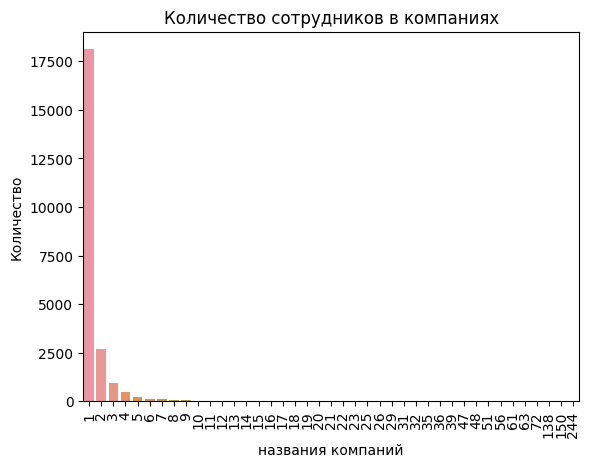

In [98]:
# Построим countplot, чтобы увидеть количество сотрудников по компаниям.
sns.countplot(data=count_people, x='employee_count')
plt.title('Количество сотрудников в компаниях')
plt.xlabel('названия компаний')
plt.ylabel('Количество')
plt.xticks(rotation=90) 
plt.show()

In [99]:
# Распределение количества сотрудников по компаниям
people_per_companies = count_people['employee_count'].value_counts().sort_index()
people_per_companies

1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
10        25
11        30
12        16
13        17
14         8
15         3
16         4
17         5
18         3
19         3
20         3
21         2
22         2
23         3
25         2
26         1
29         2
31         1
32         1
35         1
36         1
39         1
47         1
48         1
51         1
56         2
61         1
63         1
72         1
138        1
150        1
244        1
Name: employee_count, dtype: int64

На диаграмме размаха видно, что большинство компаний состоят от 1 - 14 человек, и это нормально для стартапов.

In [104]:
#Всего сотрудников
count_people=people_edu_df.groupby('company_id')['id'].nunique().reset_index()
count_people.columns = ['company_id', 'employee_count']
#Количество сотрудников по группам без образования
missing_edu = people_edu_df[people_edu_df['id_edu'].isna()]
missing_by_group = missing_edu.groupby('company_id')['id'].nunique().reset_index()
missing_by_group.columns = ['company_id', 'employees_without_edu']
# Объединим данные 
table1 = pd.merge(count_people, missing_by_group, on='company_id', how='left').fillna(0)
table1['percentage_without_edu'] = round((table1['employees_without_edu'] / table1['employee_count']) * 100, 2)


In [105]:
# разделим все компании на несколько групп по количеству сотрудников
bins = [1, 2, 3, 6, 11, float('inf')]
labels = ['1', '2', '3-5', '6-10', '11+']

table1['group']=pd.cut(table1['employee_count'], bins=bins, labels=labels, right=False)

# Рассчитаем показатели
size = table1.groupby('group').agg(total_companies=('company_id', 'count'), avg_missing_edu_per=('percentage_without_edu', 'mean')).reset_index()

# Создаем DataFrame с результатами
result = pd.DataFrame({
    'Группа': size['group'],
    'Количество компаний': size['total_companies'],
    'Доля сотрудников без информации об образовании (%)': round(size['avg_missing_edu_per'],1)
})

# Выводим результаты
print("\nРаспределение компаний по количеству сотрудников")
display(result)



Распределение компаний по количеству сотрудников


,Группа,Количество компаний,Доля сотрудников без информации об образовании (%)
0,1,18117,46.3
1,2,2709,46.6
2,3-5,1608,49.1
3,6-10,368,53.2
4,11+,120,42.8


В стартапах количество сотрудников небольшое, поэтому подробнее рассмотрели малые группы: 1 человек (сотрудников без образования 46.3%), 2 человека (46.6%), 3-5 сотрудника (49.1%), 6-10 сотрудников (53.2%), более 11 (42.8%). Интересный факт, что почти у половины сотрудников нет информации об образовании.

Далее оценим, возможно ли уже объедененному датафрейму people_edu_df присоединить degrees_df.

In [111]:
# Присоединим таблицу degrees_df на основании идентификатора записи об образовании.
df = people_edu_df.merge(degrees_df, left_on = 'id_edu', right_on = 'id_degrees', how = 'left')
df.sample(n=5)


,id,first_name,last_name,company_id,network_username,id_edu,instituition,graduated_at,id_degrees,object_id,degree_type,subject
134544,227304,Nick,Medaer,NaN,NaN,71748.0,Katholieke Universiteit Leuven,2007-01-01,71748.0,p:227304,MS,Commercial Engineering - Finance
220554,55432,Alain,Scherrer,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
63388,168666,Stephanie,Medeiros,NaN,writerary,94577.0,Oakland Community College,NaT,94577.0,p:168666,NaN,Technological Sciences
232305,65941,Dave,Young,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
208576,45170,Kelly,Spradley,35147.0,kellyspradley,14741.0,Texas A&M University,1992-01-01,14741.0,p:45170,BA,Biology


Таблицу присоединили. 

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [115]:
people_df['network_username'] = (people_df['network_username'].astype(str).str.lower().str.strip()) 
#Расчет доли уникальных значений
unique_people_df = (round(people_df['network_username'].dropna().nunique()/len(people_df)*100,2))
f" Доля уникальных network_username  в people_df: {unique_people_df}%"

' Доля уникальных network_username  в people_df: 16.93%'

In [116]:
company_and_rounds_df['network_username'] = (company_and_rounds_df['network_username'].astype(str).str.lower().str.strip()) 
#Расчет доли уникальных значений
unique_company_and_rounds_df = (round(company_and_rounds_df['network_username'].dropna().nunique()/len(company_and_rounds_df)*100,2))
f" Доля уникальных network_username  в company_and_rounds_df: {unique_company_and_rounds_df}%"

' Доля уникальных network_username  в company_and_rounds_df: 36.45%'

Процент уникальности менее 50%, поэтому network_username можно использовать только для дополнительного объединения таблиц company_and_rounds_df и people_df.

Text(0.5, 1.0, 'Пересечение ')

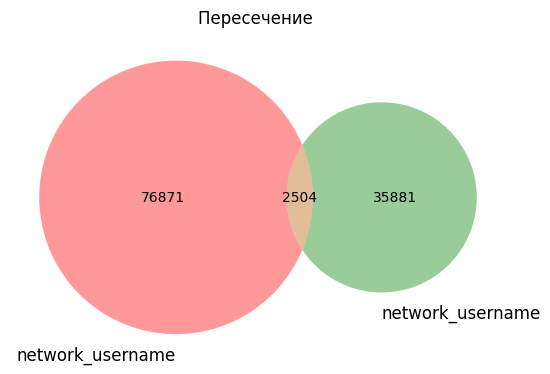

In [118]:
company_and_rounds=set(company_and_rounds_df['network_username'].dropna().unique())
people=set(people_df['network_username'].dropna().unique())
#Пересечение таблиц
f' Пересечение значений: {len(company_and_rounds&people)}'
#Построим диаграмму Венна
venn2([company_and_rounds, people], set_labels=('network_username', 'network_username'))
plt.title("Пересечение ") 

In [119]:
dolya = round(len(company_and_rounds&people)/len(company_and_rounds_df)*100,2)
f' это составляет {dolya}% от числа всех строк в company_and_rounds_df' 

' это составляет 1.15% от числа всех строк в company_and_rounds_df'

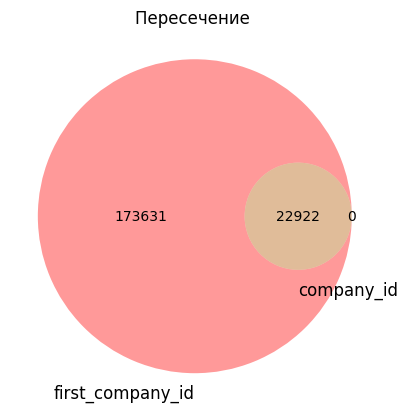

In [120]:
#Построим диаграмму Венна, чтобы ответить на вопрос, объединять или не объединять таблицы company_and_rounds и people

#Сравним содержание двух столбцов
first_id_company_and_rounds = set(company_and_rounds_df['first_company_id'].dropna().unique())
second_id_people = set(people_df['company_id'].dropna().unique())
#Построим диаграмму Венна
venn2([first_id_company_and_rounds, second_id_people], set_labels=('first_company_id', 'company_id'))
plt.title("Пересечение ") 
plt.show()


По столбцу company_id таблицу people можно присоединять.

### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Строк: 217774, Столбцов: 23
Типы данных и пропуски:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   first_company_id     217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     217774 non-null  object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones          

<AxesSubplot:>

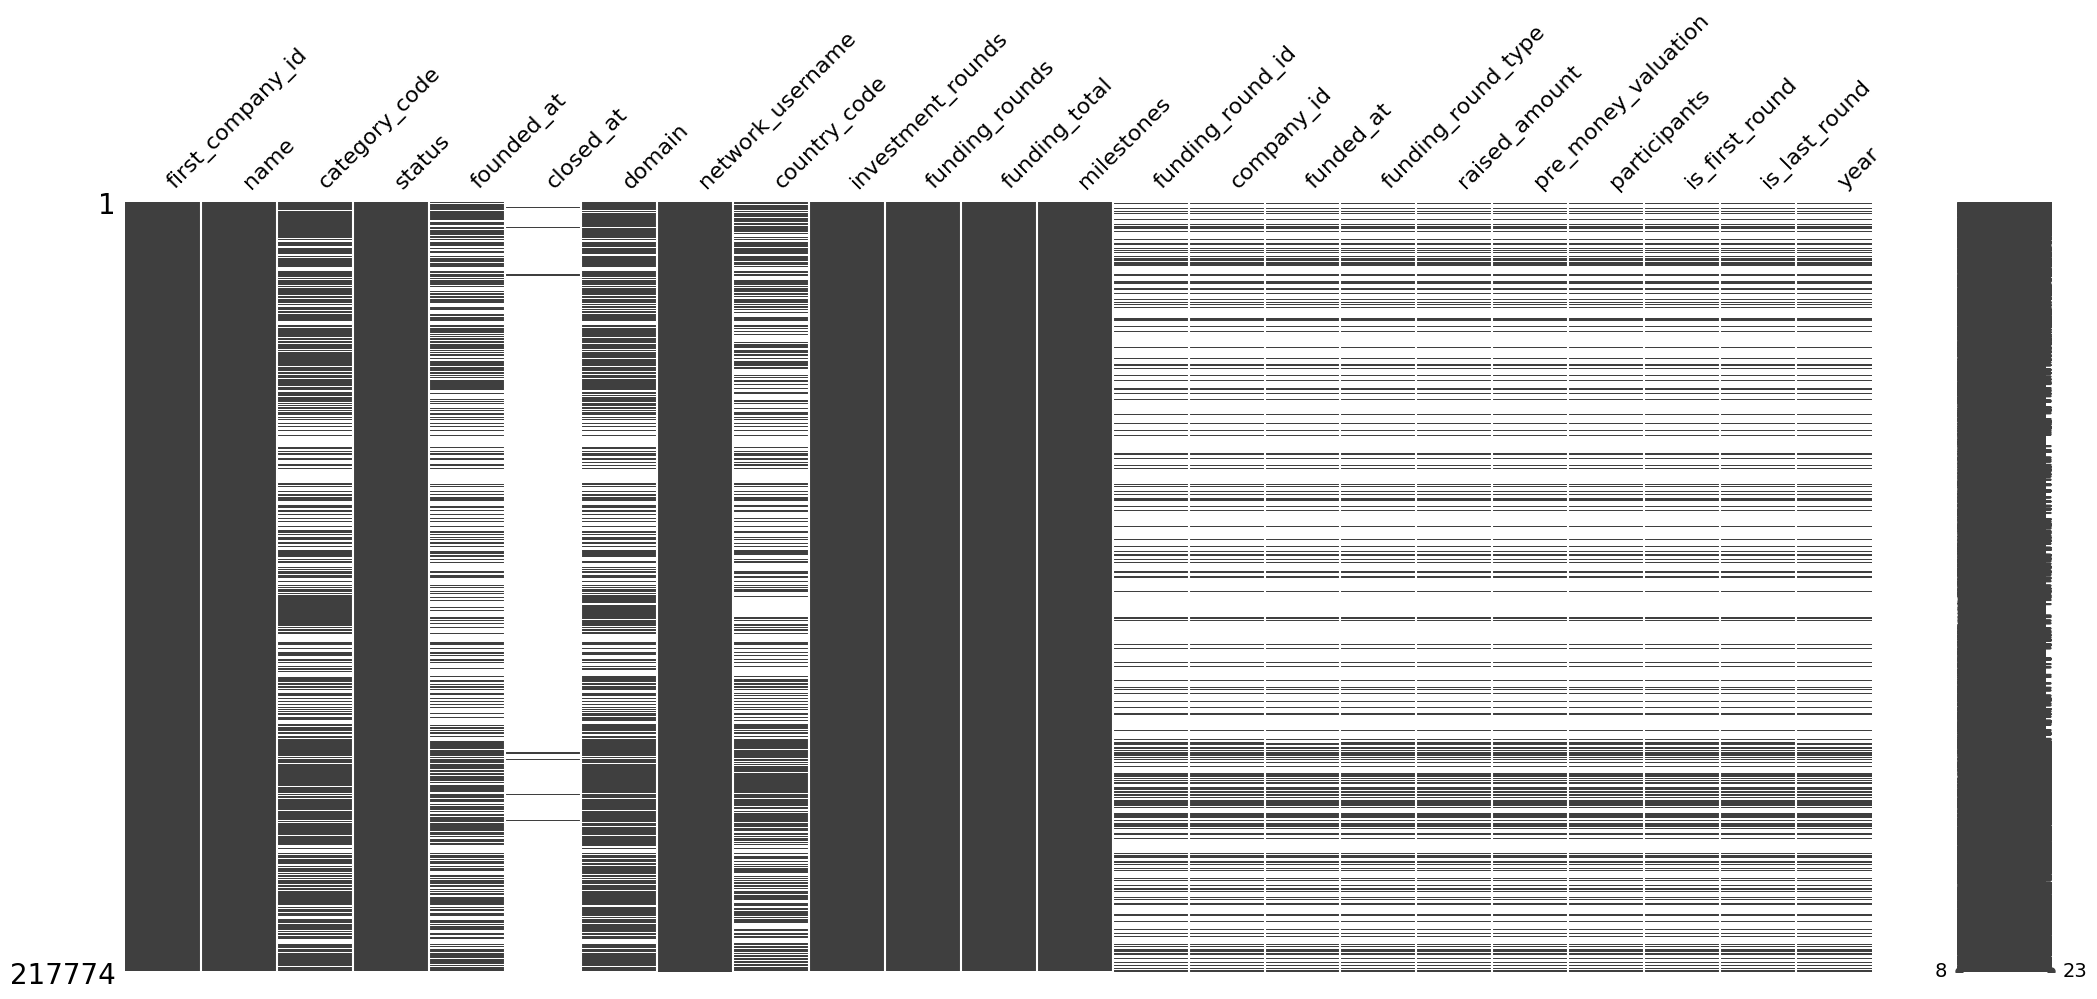

In [127]:
print(f"Строк: {len(company_and_rounds_df)}, Столбцов: {len(company_and_rounds_df.columns)}")
print(f"Типы данных и пропуски:")
print(company_and_rounds_df.info())
# Анализ пропусков
msno.matrix(company_and_rounds_df)


По анализу пропусков четко прослеживается как можно разделить эти две таблицы. В одной из них строк меньше, и это четко прослеживается. Получится две таблицы, в одной информация о компаниях, во второй информация о компаниях, у которой были раунды финансирования.

In [131]:
company_and_rounds_df['first_company_id'] = pd.to_numeric(company_and_rounds_df['first_company_id'], errors='coerce')
company_and_rounds_df['company_id'] = pd.to_numeric(company_and_rounds_df['company_id'], errors='coerce')
company_and_rounds_df[['category_code', 'status', 'country_code', 'funding_round_type']]=company_and_rounds_df[['category_code', 'status', 'country_code', 'funding_round_type']].astype('category')
company_and_rounds_df.dtypes

first_company_id              float64
name                           object
category_code                category
status                       category
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                 category
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id                    float64
funded_at              datetime64[ns]
funding_round_type           category
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
year                          float64
dtype: object

Проверим на явные и неявные дубликаты `company_and_rounds_df`.

In [133]:
#Общее количество дубликатов
total_duplicates = company_and_rounds_df.duplicated().sum()
f' Полных дубликатов: {total_duplicates}'

' Полных дубликатов: 0'

In [134]:
#Проверим дубликаты по столбцам
duplicates= company_and_rounds_df.duplicated(subset=['first_company_id', 'name', 'category_code']).sum()
f' Дубликатов по столбцам {duplicates}'

' Дубликатов по столбцам 21220'

In [135]:
company_and_rounds_df = company_and_rounds_df.drop_duplicates(subset = ['first_company_id', 'name'], keep = 'first')
f' Осталось строк после удаления дубликатов: {len(company_and_rounds_df)}'

' Осталось строк после удаления дубликатов: 196554'

Скорее всего, данные хранились ранее в двух отдельных таблицах. В одной была информация о компаниях, во второй информация о раундах финансирования. Пропробуем разделить эту таблицу.

In [137]:
#Таблица по компаниям
company_df = company_and_rounds_df[['first_company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].reset_index()
company_df.sample(n=3)
company_df.shape

(196554, 14)

In [138]:
# Таблица по раундам
rounds_df=company_and_rounds_df[['company_id', 'raised_amount', 'funding_round_id', 'funded_at', 'funding_round_type', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round', 'year']].reset_index()
rounds_df.sample(n=3)
len(rounds_df)


196554

Подготовка данных закончена.


# Шаг 3. Исследовательский анализ объединённых таблиц





### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [146]:
filtered_company_df = company_df[(company_df['funding_rounds']>0) | (company_df['investment_rounds']> 0) | (company_df['status']=='acquired')].copy()
df = filtered_company_df[['first_company_id', 'name', 'category_code', 'status', 'founded_at', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total']]
df.head(5)
df.shape

(40747, 9)


### 3.2. Анализ выбросов


Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

Отобразим гистограмму, чтобы увидеть общее типичное финансирование компаний и есть ли в них выбросы.

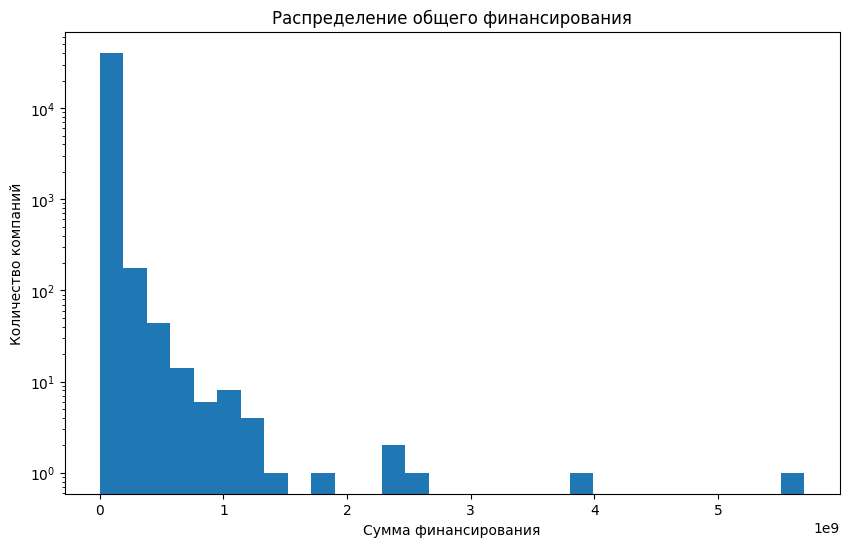

In [149]:
plt.figure(figsize=(10,6))
plt.hist(df['funding_total'], bins = 30, alpha=1, log = True)
plt.title('Распределение общего финансирования')
plt.ylabel('Количество компаний')
plt.xlabel('Сумма финансирования')
plt.show()

In [150]:
df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

По гистограмме и описанию столбца видно, что показатели имеют неравномерное распределение. Обычное финансирование компании смотрим по медиане. Это 6.000000е+05. Среднее смещено вправо из-за выбросов. Максимум это 5ю700000е+09 - слишком много, больше похоже на опечатку.  


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [154]:
#Объединим данные о компаниях и покупках одними компаниями других компаний
df_new = df.merge(acquisition_df, left_on = 'first_company_id', right_on = 'acquired_company_id', how = 'left')
# Отфильтруем компании, которые были проданы за 0 или 1 доллар, но общий объем финансирования > 0.
filtered_df_new = df_new[((df_new['price_amount']==0) | (df_new['price_amount']==1)) & (df_new['funding_total']>0)]
filtered_df_new.sample(n=5)

,first_company_id,name,category_code,status,founded_at,country_code,investment_rounds,funding_rounds,funding_total,id_acq,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
8852,17829.0,Rivermine Software,software,acquired,1999-01-01,USA,0.0,3.0,23700000.0,4932.0,25212.0,17829.0,NaN,0.0,2011-01-06
4068,152435.0,Kaptur,photo_video,acquired,NaT,USA,0.0,1.0,2000000.0,9681.0,58916.0,152435.0,NaN,0.0,2013-01-15
17422,25039.0,Biosystems International,biotech,acquired,2004-01-01,FRA,0.0,3.0,11187700.0,2291.0,32233.0,25039.0,NaN,0.0,2008-01-16
3553,1498.0,Motionbox,games_video,acquired,2006-01-01,USA,0.0,3.0,17200000.0,3540.0,354.0,1498.0,NaN,0.0,2010-07-12
18888,261146.0,Endurance Lending Network,finance,acquired,2011-12-01,USA,0.0,1.0,1500000.0,10166.0,43210.0,261146.0,stock,0.0,2013-10-25


In [156]:
f' Всего таких компаний: {len(filtered_df_new)}'


' Всего таких компаний: 1618'

Рассчитаем верхнюю и нижнюю границу выбросов для столбца `funding_total`.

In [158]:
Q1 = df_new['funding_total'].quantile(0.25)
Q3 = df_new['funding_total'].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
f' нижняя граница выбросов: {lower_bound}, верхняя граница выбросов: {upper_bound}'


' нижняя граница выбросов: -8446980.0, верхняя граница выбросов: 14078300.0'

Так как распределение нестандартное, несимметричное, то значния границ получились не такие, как при стандартном распределении, нижняя граница финансирования не может быть отрицательной, поэтому округляем до 0. Компании с финансированием более 14.1 млн считаются выбросами.



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [162]:
#Отфильтруем по сумме сделки > 0
filtrered_price_amount = df_new[df_new['price_amount']>0]
category_stat = filtrered_price_amount.groupby('category_code')['price_amount'].agg(count_company = 'count', mean_price = 'mean', median_price = 'median', std_price = 'std').reset_index()
category_stat = category_stat.sort_values(by = 'count_company', ascending = False)
display(category_stat)

,category_code,count_company,mean_price,median_price,std_price
37,software,403,3.907541e+08,4.814000e+07,1.204059e+09
3,biotech,263,7.359153e+08,2.000000e+08,1.968195e+09
41,web,260,2.767767e+08,5.550000e+07,6.954405e+08
22,mobile,117,3.529187e+08,5.600000e+07,1.319472e+09
9,enterprise,116,2.295955e+10,5.475000e+07,2.413581e+11
12,games_video,88,4.459379e+08,5.825000e+07,1.463478e+09
28,other,84,5.287721e+08,7.155000e+07,2.060861e+09
0,advertising,84,2.596701e+08,6.000000e+07,4.954839e+08
14,hardware,78,2.799422e+08,7.600000e+07,6.450874e+08
31,public_relations,74,1.820631e+09,1.100000e+08,6.854338e+09


Отфильтруем по количеству компаний > 10, иначе средние значения ненадежны.

In [164]:
category_stat = category_stat[category_stat['count_company'] >= 10] 
display(category_stat)

,category_code,count_company,mean_price,median_price,std_price
37,software,403,3.907541e+08,48140000.0,1.204059e+09
3,biotech,263,7.359153e+08,200000000.0,1.968195e+09
41,web,260,2.767767e+08,55500000.0,6.954405e+08
22,mobile,117,3.529187e+08,56000000.0,1.319472e+09
9,enterprise,116,2.295955e+10,54750000.0,2.413581e+11
12,games_video,88,4.459379e+08,58250000.0,1.463478e+09
28,other,84,5.287721e+08,71550000.0,2.060861e+09
0,advertising,84,2.596701e+08,60000000.0,4.954839e+08
14,hardware,78,2.799422e+08,76000000.0,6.450874e+08
31,public_relations,74,1.820631e+09,110000000.0,6.854338e+09


In [165]:
#Категории старапов по типично высоким ценам
category_stat_high_price = category_stat.sort_values(by = 'median_price', ascending = False)
category_stat_high_price.head(5)


,category_code,count_company,mean_price,median_price,std_price
19,manufacturing,21,8.137572e+08,351000000.0,1.060435e+09
3,biotech,263,7.359153e+08,200000000.0,1.968195e+09
4,cleantech,39,4.823162e+08,185000000.0,8.744196e+08
11,finance,20,6.043975e+08,171500000.0,1.052920e+09
34,security,36,6.028958e+08,164500000.0,1.378442e+09


Виды категорий с типично высокими ценами покупки стартапов: manufacturing, biotech, cleantech, finance, security.

In [167]:
#Категории старапов  с наибольшим разбросом цен на стартап
category_stat['cv'] = category_stat['std_price'] / category_stat['mean_price']
cv_price = category_stat.sort_values(by = 'cv', ascending=False)
cv_price.head(5)

,category_code,count_company,mean_price,median_price,std_price,cv
9,enterprise,116,2.295955e+10,54750000.0,2.413581e+11,10.512320
28,other,84,5.287721e+08,71550000.0,2.060861e+09,3.897446
31,public_relations,74,1.820631e+09,110000000.0,6.854338e+09,3.764815
22,mobile,117,3.529187e+08,56000000.0,1.319472e+09,3.738741
5,consulting,32,2.936716e+08,32150000.0,1.018109e+09,3.466829


Виды категорий с наибольшим разбросом цен за старап: enterprise, other, public_relations. mobile, consulting.

### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [171]:
df_clean = df_new[(df_new['funding_rounds'].notna()) & (df_new['funding_rounds'] != 0)].copy()
status_stat = df_clean.groupby('status')['funding_rounds'].agg(count_company = 'count', median_rounds = 'median', mean_rounds = 'mean', std_rounds = 'std', Q25=lambda x: x.quantile(0.25), Q75=lambda x: x.quantile(0.75))
status_stat.sort_values(by = 'median_rounds', ascending=False)

,count_company,median_rounds,mean_rounds,std_rounds,Q25,Q75
status,,,,,,
ipo,490,2.0,2.526531,2.219156,1.0,3.0
acquired,2641,1.0,1.897766,1.279263,1.0,2.0
closed,2089,1.0,1.383437,0.834444,1.0,2.0
operating,26535,1.0,1.642359,1.180895,1.0,2.0


Для статуса asquired медиана равна 1 раунду, типичный диапозон 1-2 раунда, статус ipo медиана равна 2 раундам, диапозон 1-3 раунда, operating медиана равна 1 раунду, диапазон от 1-2 раундов, статус closed медиана 1 раунду, диапазон 1-2 раунда.

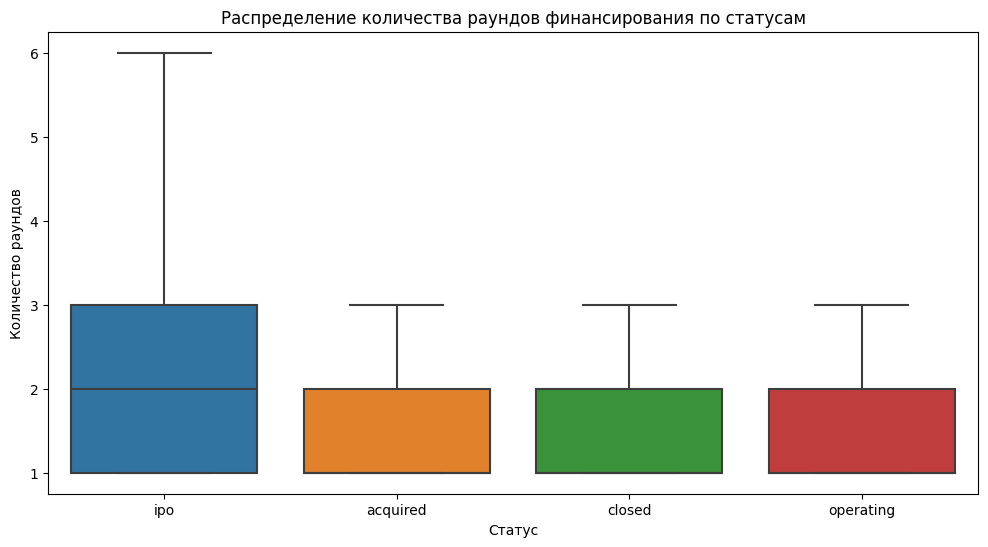

In [173]:
status_order = (df_clean.groupby('status')['funding_rounds'].median().sort_values(ascending=False).index)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='status', y='funding_rounds', order=status_order, showfliers=False)
plt.title('Распределение количества раундов финансирования по статусам')
plt.xlabel('Статус')
plt.ylabel('Количество раундов')
plt.show()

Больше всего раундов у статуса ipo, остальные примерно одинаково.

## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В данном проекте мы анализировали стартапы. Данные были предоставлены в удовлетворительном состоянии: имелось много пропусков, данные были объеденены, встречались дубликаты, типы данных не соответствовали. 
- Рассмотрели динамику типичного размера средств по годам. Увидели падение с 2005 - 2012 гг.
- Отдельно проанализировали 2013 год: заметили, что в первые 10 месяцев количество раундов было максимальным, а размер средств минимальным, далее ситуация изменилась.
- Увидели, что количество сотрудников в стартапах от 1-3 человек, чаще всего по 1.
- Отдельно рассмотрели таблицу по компаниям: нашли выбросы по сумме финансирования, выбрали наиболее удачные категории компаний по типично высоким ценам и с наибольшим разбросом цен, рассмотрели типичные значения количества раундов по статусам.

Заказчику есть о чем подумать, есть, где рискнуть.